Handling Apertures
=====================================================

In [1]:
from pyird.utils import irdstream
import pathlib

## Single Fiber Mode (`nap = 21` or `nap = 51`)

In some observations, only the star fiber (`mmf2`) is used, without the comb (or speckle) fiber (`mmf1`).
In such cases, extract the desired apertures using `aptrace` with `nap = 21` for H-band images or `nap = 51` for Y/J-band images.

In [2]:
#--------SETTINGS--------#
basedir = pathlib.Path('~/pyird/data/20210317/').expanduser()

band = 'h' #'h' or 'y'
mmf = 'mmf2' #'mmf1' (comb fiber) or 'mmf2' (star fiber)
readout_noise_mode = "default" #'real' or 'default'

datadir_flat = basedir/'flat/'
anadir = basedir/'reduc/'

fitsid_flat_star = list(range(41804,41904,2)) 
#-------------------------#

No fitsid yet.
h  band
fitsid incremented:  [41805, 41807, 41809, 41811, 41813, 41815, 41817, 41819, 41821, 41823, 41825, 41827, 41829, 41831, 41833, 41835, 41837, 41839, 41841, 41843, 41845, 41847, 41849, 41851, 41853, 41855, 41857, 41859, 41861, 41863, 41865, 41867, 41869, 41871, 41873, 41875, 41877, 41879, 41881, 41883, 41885, 41887, 41889, 41891, 41893, 41895, 41897, 41899, 41901, 41903]
median combine:  


  0%|                                                                                                                                                            | 0/50 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1032.06it/s]

/Users/yuikasagi/git/pyird/src/pyird/image/aptrace.py:251: UserWarning: Looks a single fiber aperture on the detector.
  warnings.warn("Looks a single fiber aperture on the detector.", UserWarning)


cross-section: row  1502


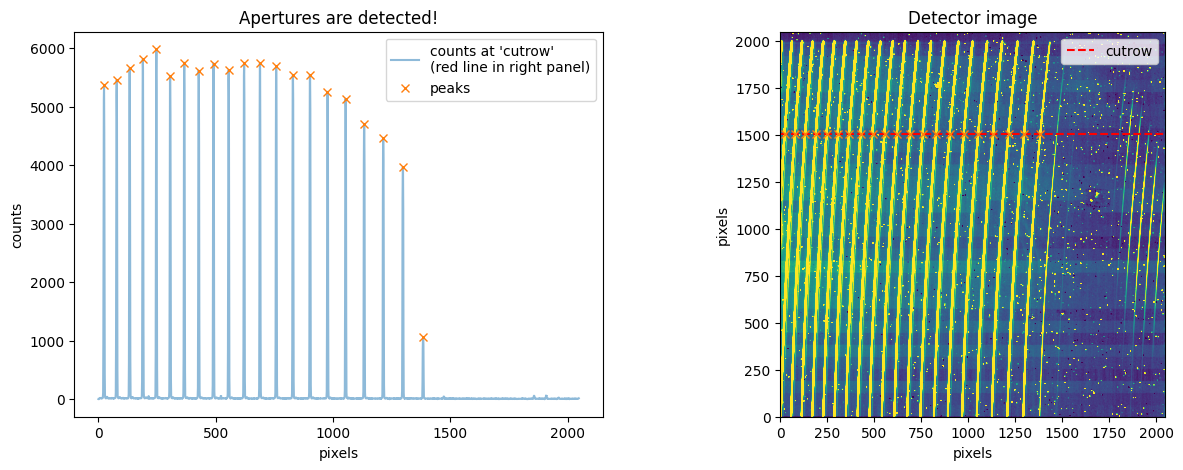

  0%|                                                                                                                                                            | 0/21 [00:00<?, ?it/s]

  5%|███████                                                                                                                                             | 1/21 [00:00<00:03,  6.29it/s]

 10%|██████████████                                                                                                                                      | 2/21 [00:00<00:03,  6.31it/s]

 14%|█████████████████████▏                                                                                                                              | 3/21 [00:00<00:02,  6.31it/s]

 19%|████████████████████████████▏                                                                                                                       | 4/21 [00:00<00:02,  6.33it/s]

 24%|███████████████████████████████████▏                                                                                                                | 5/21 [00:00<00:02,  6.34it/s]

 29%|██████████████████████████████████████████▎                                                                                                         | 6/21 [00:00<00:02,  6.34it/s]

 33%|█████████████████████████████████████████████████▎                                                                                                  | 7/21 [00:01<00:02,  6.35it/s]

 38%|████████████████████████████████████████████████████████▍                                                                                           | 8/21 [00:01<00:02,  6.35it/s]

 43%|███████████████████████████████████████████████████████████████▍                                                                                    | 9/21 [00:01<00:01,  6.36it/s]

 48%|██████████████████████████████████████████████████████████████████████                                                                             | 10/21 [00:01<00:01,  6.36it/s]

 52%|█████████████████████████████████████████████████████████████████████████████                                                                      | 11/21 [00:01<00:01,  6.38it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████                                                               | 12/21 [00:01<00:01,  6.39it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████                                                        | 13/21 [00:02<00:01,  6.39it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 14/21 [00:02<00:01,  6.37it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 15/21 [00:02<00:00,  6.35it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 16/21 [00:02<00:00,  6.36it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 17/21 [00:02<00:00,  6.34it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 18/21 [00:02<00:00,  6.33it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 19/21 [00:02<00:00,  6.34it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 20/21 [00:03<00:00,  6.34it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.34it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.35it/s]

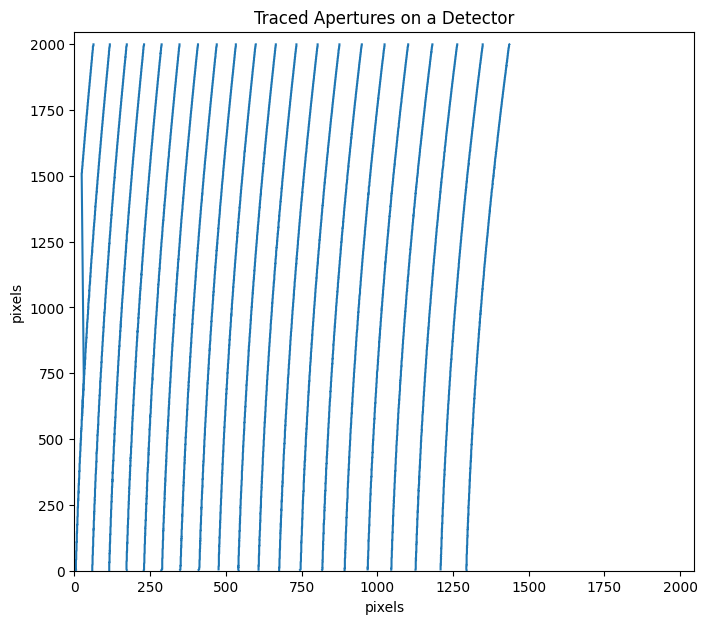

In [3]:
## FLAT_STAR
flat_star=irdstream.Stream2D("flat_star",datadir_flat,anadir)
flat_star.fitsid=fitsid_flat_star.copy()
# aperture extraction
flat_star.band=band
print(flat_star.band,' band')
if band=='h' and flat_star.fitsid[0]%2==0:
    flat_star.fitsid_increment()
    trace_mmf=flat_star.aptrace(cutrow = 1500,nap=21) 
elif band=='y':
    trace_mmf=flat_star.aptrace(cutrow = 1000,nap=51) 

## Wavelength Calibration with User Defined Apertures (`nap < 20` for H or `nap < 51` for YJ)

If you want to extract apertures of your choice, you can use `aptrace` with an arbitrary value for `nap`.

NOTE: Currently, only single fiber mode is supported. The use of both fibers simultaneously is not accounted for.

Set `ign_ord` to specify the aperture orders you do not want to trace. Ensure that the condition `len(ign_ord) + nap = 21` for H-band images or `len(ign_ord) + nap = 51` for Y/J-band images is satisfied.

No fitsid yet.
h  band
fitsid incremented:  [41805, 41807, 41809, 41811, 41813, 41815, 41817, 41819, 41821, 41823, 41825, 41827, 41829, 41831, 41833, 41835, 41837, 41839, 41841, 41843, 41845, 41847, 41849, 41851, 41853, 41855, 41857, 41859, 41861, 41863, 41865, 41867, 41869, 41871, 41873, 41875, 41877, 41879, 41881, 41883, 41885, 41887, 41889, 41891, 41893, 41895, 41897, 41899, 41901, 41903]
median combine:  


  0%|                                                                                                                                                            | 0/50 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1111.31it/s]

/Users/yuikasagi/git/pyird/src/pyird/image/aptrace.py:253: UserWarning: nap is not default value. default: nap = 42 for H / 102 for YJ.
  warnings.warn(


cross-section: row  1502


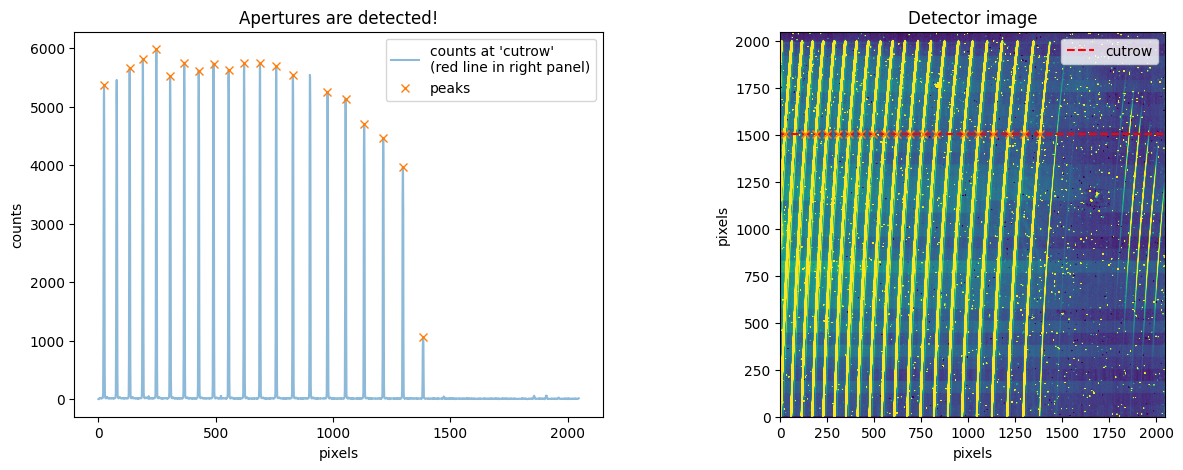

  0%|                                                                                                                                                            | 0/19 [00:00<?, ?it/s]

  5%|███████▊                                                                                                                                            | 1/19 [00:00<00:02,  6.29it/s]

 11%|███████████████▌                                                                                                                                    | 2/19 [00:00<00:02,  6.32it/s]

 16%|███████████████████████▎                                                                                                                            | 3/19 [00:00<00:02,  6.31it/s]

 21%|███████████████████████████████▏                                                                                                                    | 4/19 [00:00<00:02,  6.31it/s]

 26%|██████████████████████████████████████▉                                                                                                             | 5/19 [00:00<00:02,  6.30it/s]

 32%|██████████████████████████████████████████████▋                                                                                                     | 6/19 [00:00<00:02,  6.32it/s]

 37%|██████████████████████████████████████████████████████▌                                                                                             | 7/19 [00:01<00:01,  6.33it/s]

 42%|██████████████████████████████████████████████████████████████▎                                                                                     | 8/19 [00:01<00:01,  6.34it/s]

 47%|██████████████████████████████████████████████████████████████████████                                                                              | 9/19 [00:01<00:01,  6.34it/s]

 53%|█████████████████████████████████████████████████████████████████████████████▎                                                                     | 10/19 [00:01<00:01,  6.35it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████████                                                              | 11/19 [00:01<00:01,  6.36it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 12/19 [00:01<00:01,  6.35it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 13/19 [00:02<00:00,  6.32it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 14/19 [00:02<00:00,  6.30it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 15/19 [00:02<00:00,  6.31it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 16/19 [00:02<00:00,  6.30it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 17/19 [00:02<00:00,  6.30it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 18/19 [00:02<00:00,  6.30it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  6.30it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  6.32it/s]

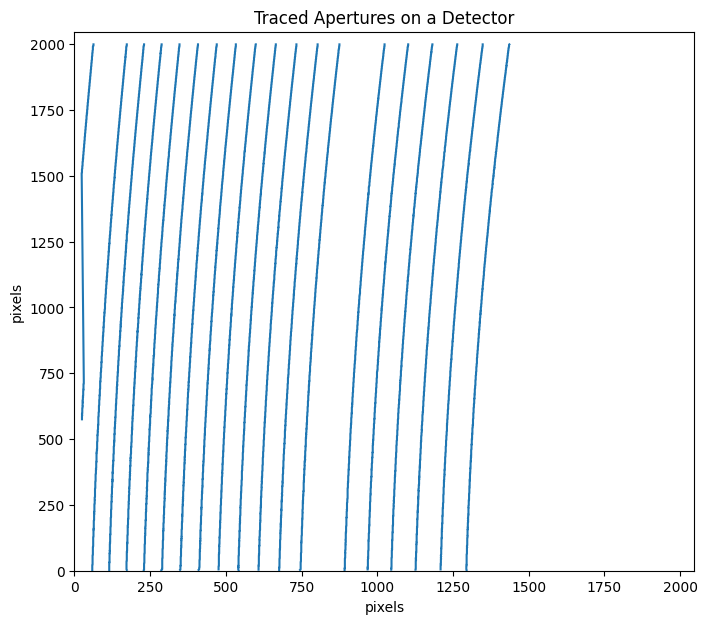

In [4]:
## FLAT_STAR
flat_star_apcut=irdstream.Stream2D("flat_star_apcut",datadir_flat,anadir)
flat_star_apcut.fitsid=fitsid_flat_star.copy()
# aperture extraction
flat_star_apcut.band=band
print(flat_star_apcut.band,' band')
if band=='h' and flat_star_apcut.fitsid[0]%2==0:
    flat_star_apcut.fitsid_increment()
    ign_ord = [2, 15]
    trace_mmf_apcut=flat_star_apcut.aptrace(cutrow = 1500,nap=19,ign_ord=ign_ord) 
elif band=='y':
    ign_ord = [51]
    trace_mmf_apcut=flat_star_apcut.aptrace(cutrow = 1000,nap=50, ign_ord=ign_ord) 

Additionally, you must set `channelfile_path` when performing `wavelength_calibration`.

For example, (1) if you want to ignore orders 2 and 15, create a new channel file in the same format as `channel_H.list`.

In [5]:
import importlib
import pandas as pd

In [6]:
# load the prepared file
channelfile_path_original = importlib.resources.files('pyird').joinpath('data/channel_H.list')
df_pixwavmap_original = pd.read_csv(channelfile_path_original)
df_pixwavmap_original

,ORDER,CHANNEL,WAVELENGTH,ST
0,1,905,1417.25,0
1,1,970,1417.86,0
2,1,1981,1425.31,0
3,2,370,1425.31,0
4,2,437,1426.08,0
...,...,...,...,...
63,20,1319,1738.53,0
64,20,1333,1738.67,0
65,20,1555,1740.67,0
66,21,164,1744.97,0


In [7]:
# Get indices to be dropped
mask_ind = df_pixwavmap_original[df_pixwavmap_original["ORDER"].isin(ign_ord)].index

# Drop the specified rows
df_pixwavmap_new = df_pixwavmap_original.drop(index=mask_ind)
df_pixwavmap_new

,ORDER,CHANNEL,WAVELENGTH,ST
0,1,905,1417.25,0
1,1,970,1417.86,0
2,1,1981,1425.31,0
6,3,689,1442.85,0
7,3,960,1445.57,1
...,...,...,...,...
63,20,1319,1738.53,0
64,20,1333,1738.67,0
65,20,1555,1740.67,0
66,21,164,1744.97,0


(2) Save `df_pixwavmap_new` to somewhere.

 ```
channelfile_path_new = "/path/to/save/new_channelfile.list"

df_pixwavmap_new.to_csv(channelfile_path_new, index=False)
```

(3) Do not forget to set `channelfle_path`.

```
thar.calibrate_wavelength(channelfile_path=channelfile_path_new, ign_ord=ign_ord)
```